# Multiple Linear Regression - Predicting Boston Housing Prices

## Importing libraries

In [236]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

Printing versions of libraries

In [237]:
print('pandas version: {}'.format(pd.__version__))
print('sklearn version: {}'.format(sklearn.__version__))
print('dmba version: {}'.format(dmba.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('numpy version: {}'.format(np.__version__))

pandas version: 1.5.3
sklearn version: 1.2.1
dmba version: 0.2.4
matplotlib version: 3.7.0
numpy version: 1.23.5


# Loading data

In [238]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


Renaming 'CAT. MEDV' column to 'CAT_MEDV'

In [239]:
df = df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})

## Analyzing data

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  CAT_MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [241]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


## Performing multiple linear regression

We will start with only three features CRIM, CHAS and RM. Later we will expand this experiment to include all the features.

In [242]:
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

X = df[predictors]
y = df[outcome]

X.head()

,CRIM,CHAS,RM
0,0.00632,0,6.575
1,0.02731,0,6.421
2,0.02729,0,7.185
3,0.03237,0,6.998
4,0.06905,0,7.147


Partioning data into training and testing sets

In [243]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Fitting regression model to training set

In [244]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

Printing coefficients and regression statistics

In [245]:
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': model.coef_}))

# printing performance measures (training data)
regressionSummary(train_y, model.predict(train_X))

  Predictor  Coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


Predicting prices in validation set

In [246]:
pred = model.predict(valid_X)
residuals = valid_y - pred

result = pd.DataFrame({'Predicted': pred, 
                       'Actual': valid_y,
                       'Residual': residuals})

# Printing predicted prices (and errors) for 20 houses in validation set 
display(result.head(20))

# printing performance measures on validation data
regressionSummary(valid_y, pred)

,Predicted,Actual,Residual
307,27.813818,28.2,0.386182
343,26.545802,23.9,-2.645802
47,20.952301,16.6,-4.352301
67,19.728016,22.0,2.271984
362,14.563121,20.8,6.236879
132,23.712901,23.0,-0.712901
292,25.993767,27.9,1.906233
31,21.031780,14.5,-6.531780
218,23.589896,21.5,-2.089896
90,24.217938,22.6,-1.617938



Regression statistics

                      Mean Error (ME) : 0.1174
       Root Mean Squared Error (RMSE) : 6.4125
            Mean Absolute Error (MAE) : 4.4558
          Mean Percentage Error (MPE) : -7.6160
Mean Absolute Percentage Error (MAPE) : 23.1676


Plotting histogram of validation errors

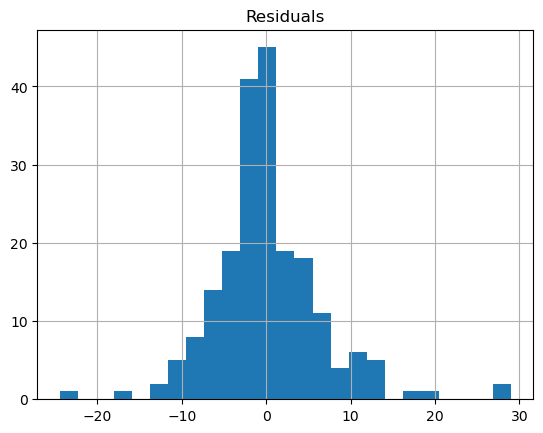

In [247]:
fix, ax = plt.subplots()
ax.hist(residuals, bins=25)
plt.title('Residuals')
plt.grid()
plt.show()

Finding the equation for predicting the median house price from the predictors in the model

In [248]:
intercept = model.intercept_
coefs = model.coef_
print(f"y = {intercept:.2f} + {coefs[0]:.2f} {X.columns[0]} + {coefs[1]:.2f} {X.columns[1]} + {coefs[2]:.2f} {X.columns[2]}")

y = -29.19 + -0.24 CRIM + 3.27 CHAS + 8.33 RM


## Reducing Number of Predictors

Reducing the number of predictors in a linear regression model is a common way to avoid overfitting and multicollinearity, which are problems that can affect the accuracy and interpretation of the model.

### Reducing predictors using Domain Knowledge

Correlation Matrix

One of the methods to reduce the number of predictors is to use a correlation matrix, which shows the pairwise correlation coefficients between all the predictors. A positive correlation means that two variables tend to move in the same direction, that is, when one variable increases, the other variable also tends to increase and likewise when one variable decreases, the other variable also tends to decrease. A negative correlation means that two variables tend to move in opposite directions, that is, when one variable increases, the other variable tends to decrease and likewise, when one variable decreases, the other variable tends to increase. A high correlation coefficient (close to 1 or -1) indicates a strong linear relationship between two predictors, which means that they measure the same thing or have redundant information. By removing one of the highly correlated predictors, we can simplify the model without losing much information. In the correlation matrix we identify the pairs of predictors that have a high correlation coefficient (for example, greater than 0.8 or less than -0.8). We choose one predictor from each pair to remove from the dataframe. We can also use some criteria to decide which predictor to keep, such as the relevance to the target variable, the number of missing values, or the domain knowledge.

In [249]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


Separating and storing predictor and outcome variables in different variable for further processing.

In [250]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

First I use the domian knowledge and figure CAT_MEDV is irrlevant to our prediction and we also do not have a description of what this value stands for. Therefore, We will drop CAT_MEDV 
from our list of predictors.

In [251]:
X = X.drop(['CAT_MEDV'], axis=1)

In [252]:
corr_matrix = X.corr()
display(corr_matrix)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


Representing correlation matrix as heatmatp for convenience of fact finding

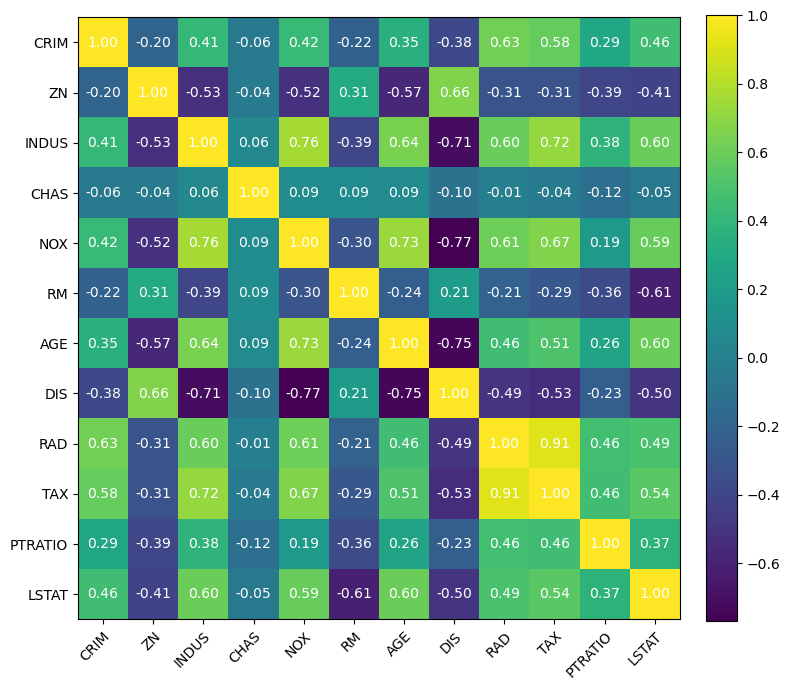

In [253]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(corr_matrix)

# Create colorbar
ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(X.columns)), labels = X.columns)
ax.set_yticks(np.arange(len(X.columns)), labels = X.columns)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

The first step in trying to reduce the number of predictors is to use domain knowledge. Therefore, to evaluate relationships between variables shown in above correlation matrix we use our domain knowledge. We set our benchmarks to 0.75. We look for variables that have correlation coefficient greater than 0.75 and less than -0.75. Above heatmap shows that NOX and INDUS and TAX and RAD have high correlation of 0.76 and 0.91 respectively. Likewise, DIS and NOX have negative correlation of -0.77 which is less than -0.75. 

What does NOX, INDUS, TAX, RAD and DIS stand for? NOX is a short name for nitric oxide concentration (parts per 10 million). INDUS stands for proportion of nonretail business acres per town. TAX means full-value property-tax rate per $10,000. RAD means index of accessibility to radial highways and DIS stands for weighted distances to five Boston employment centers. 

Between NOX and INDUS, for a businessmen INDUS is more important than NOX. However, since NOX directly impacts health, I choose to keep NOX and drop INDUS from my list of predictors.

Between TAX and RAD, most people are concerned with tax more than accessibility to radial highways. Therefore, I choose to keep TAX and drop RAD from my list of predictors. 

Similarly, between DIS and NOX, again I prioritize health and wellbeing over others. Therefore, I will keep NOX and drop DIS from my list of predictors.

Dropping INDUS, RAD and DIS from list of predictors will bring the number of predictors to 9.

In [254]:
X = X.drop(['INDUS', 'RAD', 'DIS'], axis=1)
X.head()

,CRIM,ZN,CHAS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
0,0.00632,18.0,0,0.538,6.575,65.2,296,15.3,4.98
1,0.02731,0.0,0,0.469,6.421,78.9,242,17.8,9.14
2,0.02729,0.0,0,0.469,7.185,61.1,242,17.8,4.03
3,0.03237,0.0,0,0.458,6.998,45.8,222,18.7,2.94
4,0.06905,0.0,0,0.458,7.147,54.2,222,18.7,5.33


### Reducing predictors using Computational Power and Statistical Performance

In the next step we will make use of computational power and statistical performance metrics to reduce the number of predictors further. Refer to chapter 6 of following book for further explanations of these methods. 

Shmueli, G., Bruce, P., Gedek, P., & Patel, N. R., (2020c). Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python.

Exhaustive Search

First approach is the exhaustive search. In the exhaustive search we find the best subset of predictors by fitting regression models with all the possible combinations of predictors. Exhaustive search is not practical in many applictions due to the large number of possible models. 

Partioning data in training and testing sets

In [255]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#### Exhaustive Search

Implementing exhaustive search

In [256]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

,n,r2adj,AIC,AGE,CHAS,CRIM,LSTAT,NOX,PTRATIO,RM,TAX,ZN
0,1,0.572980,1934.913465,False,False,False,True,False,False,False,False,False
1,2,0.651683,1874.178531,False,False,False,True,False,False,True,False,False
2,3,0.687239,1842.541774,False,False,False,True,False,True,True,False,False
3,4,0.693208,1837.687606,False,True,False,True,False,True,True,False,False
4,5,0.696904,1834.997558,False,True,False,True,True,True,True,False,False
5,6,0.698387,1834.489068,True,True,False,True,True,True,True,False,False
6,7,0.698255,1835.596654,True,True,True,True,True,True,True,False,False
7,8,0.697997,1836.826208,True,True,True,True,True,True,True,True,False
8,9,0.697224,1838.568478,True,True,True,True,True,True,True,True,True


We can see that r2adj increases until 6 predictors and then slowly decreases. The AIC also indicates that a model with 7 predictors is good. The dominant predictor in all models is LSTAT, with CHAS, PTRATIO and RM playing important roles as well. Therefore, according to this method best set of predictors is AGE, CHAS, LSTAT, NOX, PTRATIO and RM. 

Popular Subset Selection Algorithms

The second method of finding the best subset of predictors relies on a partial, iterative search through the space of all possible regression models. The end product is the one best subset of predictors. Three popular iterative search algorithms are forward selection, backward elimination, and stepwise regression. They are reasonable methods for situations with a large number of predictors, but for a moderate number of predictors, the exhaustive search is preferable. 

#### Forward Selection

In this method we start with no predictors and then add predictors one by one. Each predictor is the one (among all predictors) that has the largest contribution to R-sq on top of the predictors that are already in it. The algorithm stops when the contribution of additional predictors is not statistically significant. The main disadvantage of this method is that the algorithm will miss pairs or groups of predictors that perform very well together but perform poorly as single predictors. This is similar to interviewing job candidates for a team project one by one, thereby missing groups of candidates who perform superiorly together (“colleagues”), but poorly on their own or with non-colleagues.

In [257]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model,
verbose=True)
print(best_variables)

Variables: CRIM, ZN, CHAS, NOX, RM, AGE, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1834.49, add AGE
Step: score=1834.49, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'AGE']


#### Backward Elimination

In backward elimination, we start with all predictors and then at each step, eliminate the least useful predictor (according to statistical significance). The algorithm stops when all the remaining predictors have significant contributions. The weakness of this algorithm is that computing the initial model with all predictors can be time-consuming and unstable.

In [258]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
score_model, verbose=True)

print(best_variables)

Variables: CRIM, ZN, CHAS, NOX, RM, AGE, TAX, PTRATIO, LSTAT
Start: score=1838.57
Step: score=1836.83, remove ZN
Step: score=1835.60, remove TAX
Step: score=1834.49, remove CRIM
Step: score=1834.49, remove None
['CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT']


#### Stepwise Regression

Stepwise regression is like forward selection except that at each step, we consider dropping predictors that are not statistically significant, as in backward elimination.

In [259]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model,
verbose=True)
print(best_variables)

Variables: CRIM, ZN, CHAS, NOX, RM, AGE, TAX, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1835.00, add NOX
Step: score=1834.49, add AGE
Step: score=1834.49, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS', 'NOX', 'AGE']


We see that all algorithms, exhaustive search, forward selection, backward elimination and stepwise regression came up with same six predictors that are considered best to predict the price of the house. The six predictors are 'AGE', 'CHAS', 'LSTAT', 'NOX', 'PTRATIO' and 'RM'. 

#### Predicting performance on new set of predictors

Let's check the validation performance on the 6-predictor model. 

In [260]:
pred = best_model.predict(valid_X[best_variables])
regressionSummary(valid_y, pred)


Regression statistics

                      Mean Error (ME) : 0.1723
       Root Mean Squared Error (RMSE) : 5.4621
            Mean Absolute Error (MAE) : 3.9162
          Mean Percentage Error (MPE) : -4.4596
Mean Absolute Percentage Error (MAPE) : 18.3126


Comparing the regression statistics of six-predictor model with three-predictor model that we predicted first in this experiment, we see that six-perdictor model is better than the three-predictor model in the sense that all the errors in six-predictor model ME, RMSE, MAE, MPE and MAPE are less than three-predictor model.